# **Instance Segmentation** YOLOv8

## 1. 라이브러리 설치 및 가져오기

In [ ]:
# 패키지 설치하기
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.5/756.5 kB 4.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# 패키지 가져오기

import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/107.7 GB disk)


## **2. 데이터셋 가져오기**
### 방법1 : 구글 드라이브 공유 파일  다운로기 하기

In [ ]:
# 테스트 데이터 다운로드하기 : test_image_dir.zip
!gdown 16U_uTZJm3rBgOfPTFkotQr5zry_NxRyB

Downloading...
From: https://drive.google.com/uc?id=16U_uTZJm3rBgOfPTFkotQr5zry_NxRyB
To: /content/test_image_dir.zip
100% 226k/226k [00:00<00:00, 99.2MB/s]


In [ ]:
# 압축 파일 해제하기
import os
import zipfile

with zipfile.ZipFile('/content/test_image_dir.zip') as target_fle:
    target_fle.extractall('/content/test_image_dir')

## 2-1. 테스트 이미지 나타내기

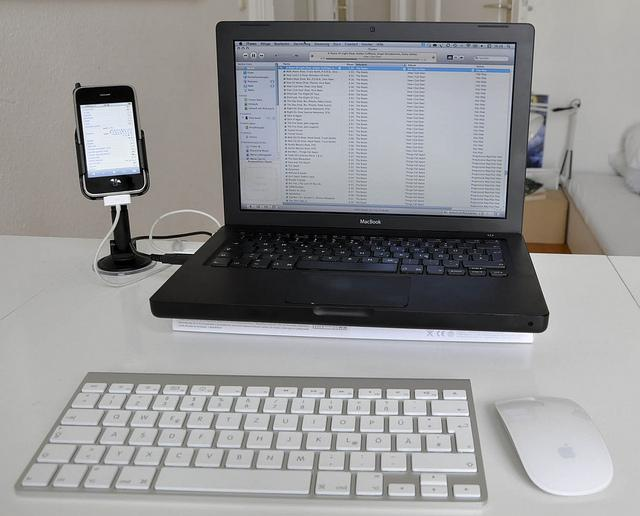

In [ ]:
# 테스트 이미지 1개 나타내기
from PIL import Image

with Image.open('/content/test_image_dir/test1.jpg') as test_image:
    display(test_image)

In [ ]:
# 테스트 이미지 모두 나타내기
# print('test images = ', os.listdir('/content/test_image_dir'))

image_dir = '/content/test_image_dir'

for file_name in os.listdir(image_dir):
    file_path = os.path.join(image_dir, file_name)
    # 파일 확장자가 .jpg인 경우에만 처리
    if file_path.endswith('.jpg'):
        with Image.open(file_path) as img:
            display(img)

Output hidden; open in https://colab.research.google.com to view.

## **3.Instance Segmentation**

### 3-1. 모델 가져오기

In [ ]:
# YOLO 라이브러리 가져오기
from ultralytics import YOLO    # ... code here

# 'yolov8n-seg.pt' 모델 선언하기
model = YOLO("yolov8n-seg.pt")    # ... code here

100%|██████████| 6.73M/6.73M [00:00<00:00, 85.7MB/s]


In [ ]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

## 3-2. 모델 예측하기

In [ ]:
# 'test_image_dir' 폴더 하위에 있는 jpg 이미지 파일로 source 지정하여 predict() 하기
# 결과 저장하기 : save =True 사용
results = model.predict(source="/content/test_image_dir/*.jpg", save=True)    # ... code here


image 1/4 /content/test_image_dir/test1.jpg: 544x640 1 cat, 1 laptop, 1 mouse, 2 keyboards, 1 cell phone, 583.6ms
image 2/4 /content/test_image_dir/test2.jpg: 448x640 5 zebras, 1 giraffe, 238.1ms
image 3/4 /content/test_image_dir/test3.jpg: 640x640 2 cups, 1 bowl, 2 sandwichs, 1 dining table, 321.7ms
image 4/4 /content/test_image_dir/test4.jpg: 480x640 2 persons, 1 horse, 261.7ms
Speed: 6.5ms preprocess, 351.3ms inference, 755.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict


## 3-3.test image Segmentation 결과 내용 및 이미지 출력

- 테스트 이미지 1개 예측 결과 나타내기


class num : counts = , {15.0: 1, 63.0: 1, 64.0: 1, 66.0: 2, 67.0: 1}
class num: 64, class name: mouse       , confidence: 0.98
class num: 63, class name: laptop      , confidence: 0.96
class num: 67, class name: cell phone  , confidence: 0.86
class num: 66, class name: keyboard    , confidence: 0.84
class num: 15, class name: cat         , confidence: 0.30
class num: 66, class name: keyboard    , confidence: 0.28


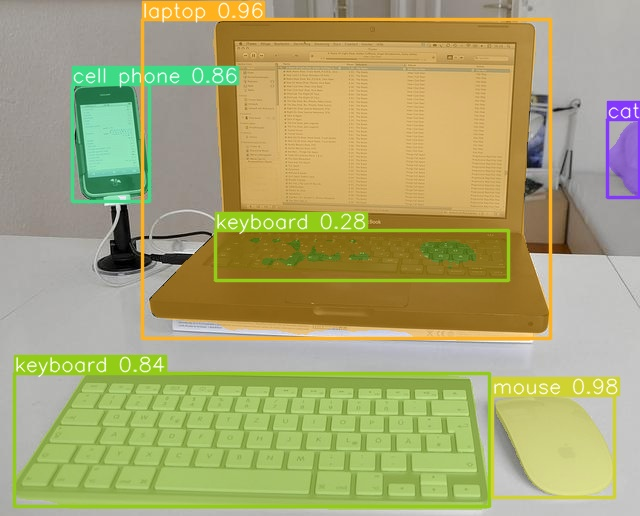

In [ ]:
import numpy as np
from PIL import Image

# result[0] 결과 출력하기
uniq, cnt = np.unique(results[0].boxes.cls.cpu().numpy(), return_counts=True) # Torch.Tensor => numpy 로 변환
uniq_cnt_dict = dict(zip(uniq, cnt))

print(f'\nclass num : counts = , {uniq_cnt_dict}')

# 객체의 종류를 나타내는 고유값이 result.boxes.cls에 저장되어 있음
# Yolov8모델을 그대로 사용해서 MS COCO Dataset에서 정의한 0~79값이 기본적으로 사용됨
for i, c in enumerate(results[0].boxes.cls):
    class_id = int(c)
    class_name = results[0].names[class_id]
    confidence_score = results[0].boxes.conf[i]  # 예측 확률
    print(f'class num: {class_id}, class name: {class_name :<12}, confidence: {confidence_score:.2f}')

# 이미지 파일('test1.jpg')을 엽니다.
with Image.open('/content/runs/segment/predict/test1.jpg') as pred_image:
    display(pred_image)

- 테스트 이미지 모두 예측 결과 나타내기

In [ ]:
# results 의 모든 결과 ( class_id, class_num, confidence_score 나타내기 )
for result in results:
    uniq, cnt = np.unique(result.boxes.cls.cpu().numpy(), return_counts=True) # Torch.Tensor => numpy 로 변환
    uniq_cnt_dict = dict(zip(uniq, cnt))

    print(f'\nclass num : counts = , {uniq_cnt_dict}')

    for i, c in enumerate(result.boxes.cls):
        class_id = int(c)
        class_name = result.names[class_id]
        confidence_score = result.boxes.conf[i]  # 예측 확률
        print(f'class num: {class_id:>2} , class name: {class_name :<13}, confidence: {confidence_score:.2f}')
                            # 2자리로 표현                  13글자로



class num : counts = , {15.0: 1, 63.0: 1, 64.0: 1, 66.0: 2, 67.0: 1}
class num: 64 , class name: mouse        , confidence: 0.98
class num: 63 , class name: laptop       , confidence: 0.96
class num: 67 , class name: cell phone   , confidence: 0.86
class num: 66 , class name: keyboard     , confidence: 0.84
class num: 15 , class name: cat          , confidence: 0.30
class num: 66 , class name: keyboard     , confidence: 0.28

class num : counts = , {22.0: 5, 23.0: 1}
class num: 23 , class name: giraffe      , confidence: 0.94
class num: 22 , class name: zebra        , confidence: 0.93
class num: 22 , class name: zebra        , confidence: 0.49
class num: 22 , class name: zebra        , confidence: 0.40
class num: 22 , class name: zebra        , confidence: 0.39
class num: 22 , class name: zebra        , confidence: 0.25

class num : counts = , {41.0: 2, 45.0: 1, 48.0: 2, 60.0: 1}
class num: 45 , class name: bowl         , confidence: 0.92
class num: 48 , class name: sandwich     , con

In [ ]:
from PIL import Image
from IPython.display import display

# 이미지가 저장된 폴더 경로
image_dir = '/content/runs/segment/predict'

# 폴더 내의 모든 파일을 순회
for file_name in os.listdir(image_dir):
    file_path = os.path.join(image_dir, file_name)
    # 파일 확장자가 .jpg인 경우에만 처리
    if file_path.endswith('.jpg'):
        with Image.open(file_path) as img:
            display(img)

Output hidden; open in https://colab.research.google.com to view.

## 다운로드를 위한 검출 결과 파일 압축파일로 만들기

In [ ]:
import glob

detetced_image_list = glob.glob(('/content/runs/segment/predict/*.jpg'))
detected_image_nums = len(detetced_image_list)

print(detected_image_nums)
print(detetced_image_list)

4
['/content/runs/segment/predict/test1.jpg', '/content/runs/segment/predict/test3.jpg', '/content/runs/segment/predict/test4.jpg', '/content/runs/segment/predict/test2.jpg']


In [ ]:
# 다운로드를 위한 inference image 압축

import zipfile
import os

if not os.path.exists('/content/detected_result/'):
    os.mkdir('/content/detected_result/')
    print('detected_result dir is created !!!')

with zipfile.ZipFile('/content/detected_result/detected_images.zip', 'w') as detected_images:
    for idx in range(detected_image_nums):
        detected_images.write(detetced_image_list[idx])

detected_result dir is created !!!
